# Domain Comrehension - Current Population Survey, August 2016

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_NEW.csv", index_col=None)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,sex,marital,race,state,citizen,worker_class,industry,occupation,faminc_50,ismarried
0,17,60,34,7,11,0,1,6,1,36,1,6,1,18,0,0
1,64,20,35,16,2,0,1,1,1,18,1,6,6,21,1,1
2,55,40,36,2,2,0,1,1,1,23,1,6,47,20,0,1
3,58,18,36,9,2,0,1,4,1,37,1,6,22,14,0,0
4,17,15,36,15,5,0,1,6,1,27,1,6,1,18,1,0


# Looking at the data

The CPS is used to collect data for a variety of other studies that keep the nation informed of the economic and social well-being of its people. This dataset includes 55178 entries representing responses from single-job holding Americans from August 2016.

In [6]:
data.info()
# Note: Some methods will require numerical values to be converted to floating point numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55253 entries, 0 to 55252
Data columns (total 16 columns):
age             55253 non-null int64
weekly_hrs      55253 non-null int64
educ            55253 non-null int64
fam_income      55253 non-null int64
num_in_house    55253 non-null int64
num_child       55253 non-null int64
sex             55253 non-null int64
marital         55253 non-null int64
race            55253 non-null int64
state           55253 non-null int64
citizen         55253 non-null int64
worker_class    55253 non-null int64
industry        55253 non-null int64
occupation      55253 non-null int64
faminc_50       55253 non-null int64
ismarried       55253 non-null int64
dtypes: int64(16)
memory usage: 6.7 MB


# Describing the data

This dataset has a mix of numerical and categorical variables. All of the categorical variables are represented as integers which represent different categories. You can see which number represent which categories in the CPS Dataset Description PDF. Some of the numerical data is represented as increasing integers, each which represents a larger range of numbers. For instance, the valid entries for 'fam_income' are:

- 1	LESS THAN 5,000
- 2	5,000 TO 7,499
- 3	7,500 TO 9,999
- 4	10,000 TO 12,499
- 5	12,500 TO 14,999
- 6	15,000 TO 19,999
- 7	20,000 TO 24,999
- 8	25,000 TO 29,999
- 9	30,000 TO 34,999
- 10	35,000 TO 39,999
- 11	40,000 TO 49,999
- 12	50,000 TO 59,999
- 13	60,000 TO 74,999
- 14	75,000 TO 99,999
- 15	100,000 TO 149,999
- 16	150,000 OR MORE		

## Please refer to the CPS Dataset Description PDF for a description of each variable and their valid entries. 

The following variables are strictly numerical:

    age, num_in_house (number of people living in current household), 
    num_child (number of children <18), weekly_hrs,

The following variables are strictly categorical:

    sex, state, citizen, race, marital, worker_class, industry, occupation, fam_inc_50, ismarried

The following variables CAN be used numerically, but also can be used categorically when using classification methods:

    educ, fam_income

- As you can see below, the mean for 'fam_income' Referring to the PDF (or from example above), we can see that 12 represents '50,000 to 59,999' and 13 represents '60,000 to 74,999'. Therefore we can estimate that the average family income from this dataset is between 50,000 to 59,999.

- The mean for 'educ' is 40.789. Referring to the PDF, we can see that the integer entries for education reprent the growing levels of education from 31: 'before first grade' to 46: 'doctorage degree'. 40.789 lies between 40: 'some college but no degree' and 41:'associates degree'. This doesn't give us the most accurate representation, but the number representation gives us an estimation as to when level of education someone has achieved.

In [7]:
data.describe(include='all')

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,sex,marital,race,state,citizen,worker_class,industry,occupation,faminc_50,ismarried
count,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000,55253.000000
mean,42.655421,39.149530,40.789079,12.181311,3.074494,0.600999,1.471739,2.922212,1.386549,28.345375,1.534722,3.811829,30.935316,12.193311,0.665665,0.560657
std,14.542007,10.828618,2.565940,3.495008,1.552056,1.015603,0.499205,2.242702,0.983558,16.178664,1.264564,0.745296,14.492841,6.805350,0.471762,0.496312
min,15.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,31.000000,40.000000,39.000000,10.000000,2.000000,0.000000,1.000000,1.000000,1.000000,13.000000,1.000000,4.000000,22.000000,7.000000,0.000000,0.000000
50%,42.000000,40.000000,40.000000,13.000000,3.000000,0.000000,1.000000,1.000000,1.000000,29.000000,1.000000,4.000000,36.000000,14.000000,1.000000,1.000000
75%,54.000000,40.000000,43.000000,15.000000,4.000000,1.000000,2.000000,6.000000,1.000000,42.000000,1.000000,4.000000,42.000000,17.000000,1.000000,1.000000
max,85.000000,99.000000,46.000000,16.000000,14.000000,9.000000,2.000000,6.000000,6.000000,56.000000,5.000000,6.000000,51.000000,22.000000,1.000000,1.000000


Check dataframe for NaNs

In [8]:
data.isnull().values.any()

False

# Plotting

For plotting purposes, we are only going to take a small sample of the 55178 entries. Lets start by plotting each numerical variable against every other numerical variable. I am also going to remove the strictly categorical columns to show the relevant data. 

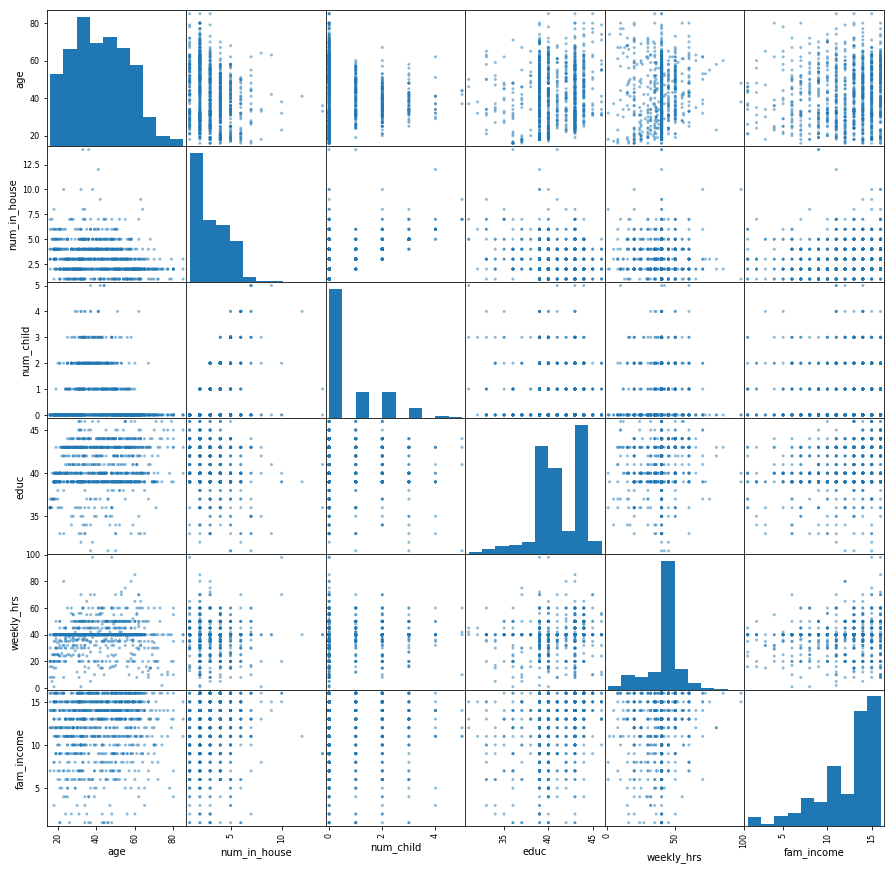

In [11]:
plotdata = data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']].sample(n=1000)

pd.plotting.scatter_matrix(plotdata, figsize=(15,15), alpha=.5)
plt.show()

Now lets make some bar graphs to describe the categorical data
- The categories in the charts below are represented as integers
- Please refer to the CPS Dataset Description PDF for a string representation of the category numbers

<BarContainer object of 51 artists>

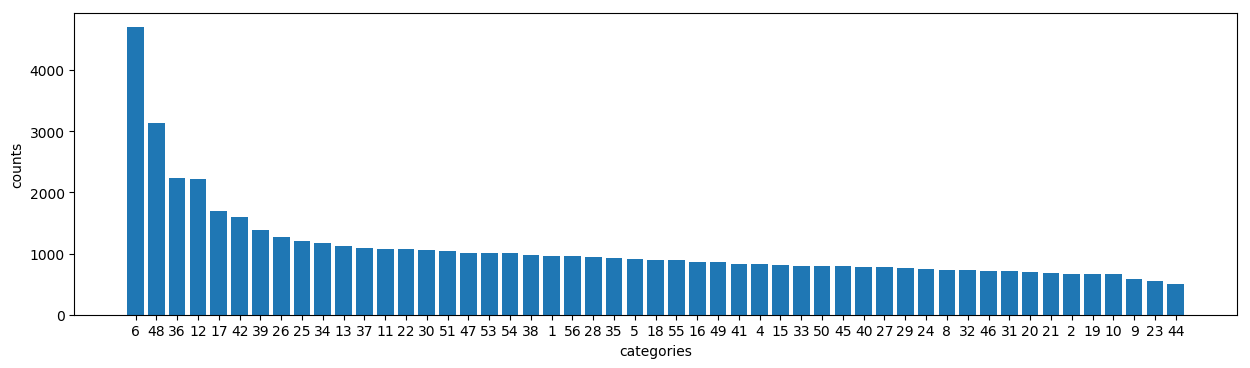

In [27]:
# State

fig, ax = plt.subplots(1, figsize=(15,4), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.state.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 5 artists>

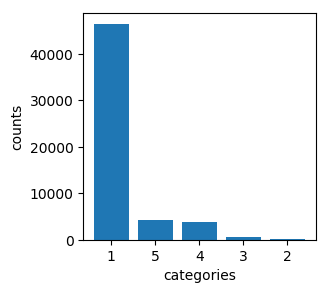

In [28]:
# Citizenship Status

fig, ax = plt.subplots(1, figsize=(3,3), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.citizen.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 6 artists>

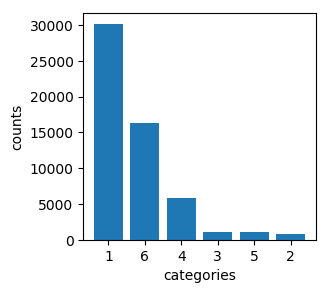

In [29]:
# Marital Status

fig, ax = plt.subplots(1, figsize=(3,3), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.marital.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 14 artists>

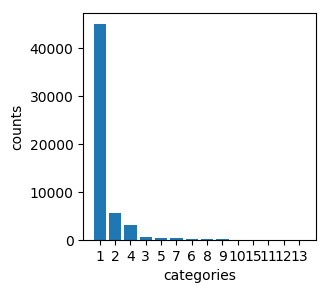

In [30]:
# Race

fig, ax = plt.subplots(1, figsize=(3,3), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.race.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 6 artists>

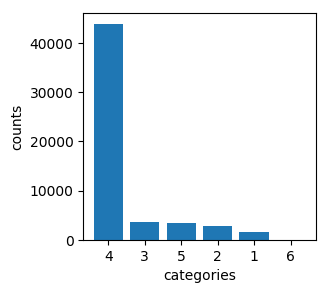

In [31]:
# Worker Class

fig, ax = plt.subplots(1, figsize=(3,3), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.worker_class.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 51 artists>

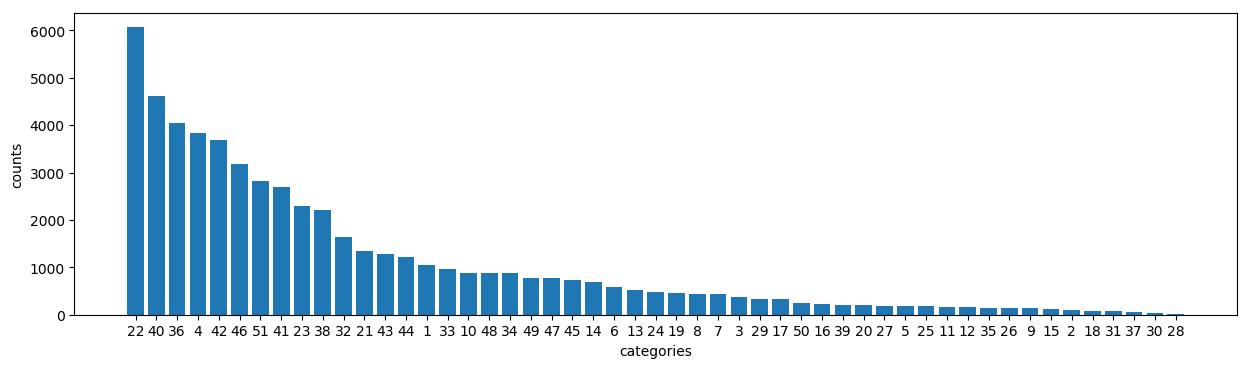

In [32]:
# Industry

fig, ax = plt.subplots(1, figsize=(15,4), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.industry.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 22 artists>

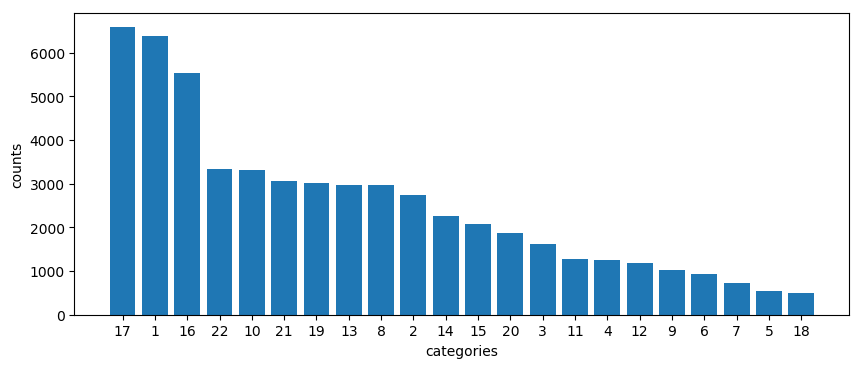

In [33]:
# Occupation

fig, ax = plt.subplots(1, figsize=(10,4), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.occupation.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 2 artists>

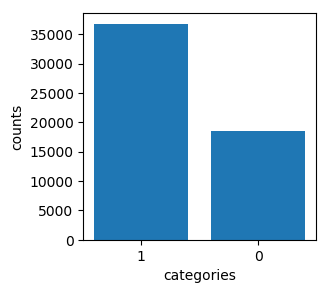

In [15]:
# Family Income over $50,000 (1 yes or 0 no)

fig, ax = plt.subplots(1, figsize=(3,3), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.fam_inc_50.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))

<BarContainer object of 2 artists>

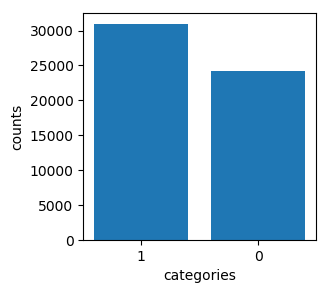

In [16]:
# Is individual married (1 yes or 0 no)

fig, ax = plt.subplots(1, figsize=(3,3), dpi=100)
ax.set_xlabel("categories") 
ax.set_ylabel("counts")
value_counts = data.ismarried.value_counts()
values = value_counts.keys().astype(str)
ax.bar(values, list(value_counts))